2) The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,
and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value
(1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes
we will consider this data as a population. Use this data to perform the following:

Imports & Load Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('/content/diabetes.csv')
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Basic Population Stats

In [14]:

population = df.copy()

pop_glucose_mean = population['Glucose'].mean()
pop_glucose_max  = population['Glucose'].max()
pop_bmi_p98      = population['BMI'].quantile(0.98)

pop_bp_mean = population['BloodPressure'].mean()
pop_bp_sd   = population['BloodPressure'].std(ddof=1)
pop_bp_p98  = population['BloodPressure'].quantile(0.98)

print("Population Glucose mean:", pop_glucose_mean)
print("Population Glucose max :", pop_glucose_max)
print("Population BMI 98th pct:", pop_bmi_p98)
print("\nPopulation BloodPressure mean:", pop_bp_mean)
print("Population BloodPressure SD  :", pop_bp_sd)
print("Population BloodPressure 98th:", pop_bp_p98)


Population Glucose mean: 120.89453125
Population Glucose max : 199
Population BMI 98th pct: 47.52599999999996

Population BloodPressure mean: 69.10546875
Population BloodPressure SD  : 19.355807170644777
Population BloodPressure 98th: 99.31999999999994


**a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations
and find the mean Glucose and highest Glucose values of this sample and compare these
statistics with the population statistics of the same variable. You should use charts for this
comparison.**

Taken Random Sample of 25 with Seed

In [15]:
np.random.seed(123)
sample_25 = population.sample(n=25, replace=False)

sample_glucose_mean = sample_25['Glucose'].mean()
sample_glucose_max  = sample_25['Glucose'].max()

print("Sample (n=25) Glucose mean:", sample_glucose_mean)
print("Sample (n=25) Glucose max :", sample_glucose_max)

Sample (n=25) Glucose mean: 130.36
Sample (n=25) Glucose max : 197


Chart: Compare Sample vs Population (Mean & Max Glucose)

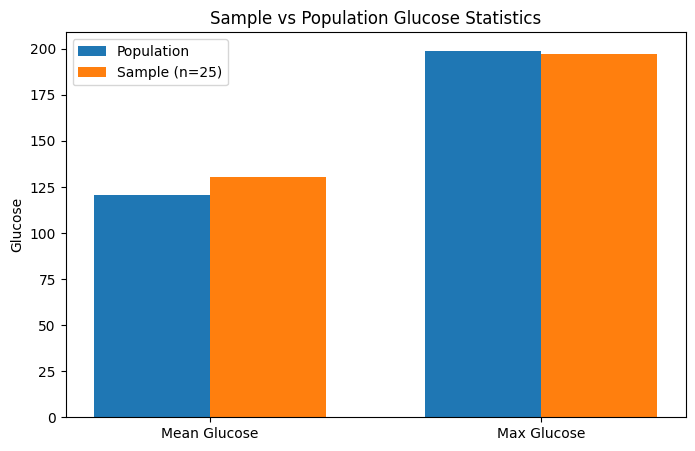

In [16]:
labels = ['Mean Glucose', 'Max Glucose']
sample_values = [sample_glucose_mean, sample_glucose_max]
population_values = [pop_glucose_mean, pop_glucose_max]

x = np.arange(len(labels))  # positions
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, population_values, width, label='Population')
plt.bar(x + width/2, sample_values,     width, label='Sample (n=25)')

plt.xticks(x, labels)
plt.ylabel('Glucose')
plt.title('Sample vs Population Glucose Statistics')
plt.legend()
plt.show()


**b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.**

98th percentile of BMI (sample vs population) + chart

In [17]:
sample_bmi_p98 = sample_25['BMI'].quantile(0.98)

print("Sample BMI 98th percentile:", sample_bmi_p98)
print("Population BMI 98th percentile:", pop_bmi_p98)


Sample BMI 98th percentile: 45.263999999999996
Population BMI 98th percentile: 47.52599999999996


Chart: 98th Percentile BMI Comparison

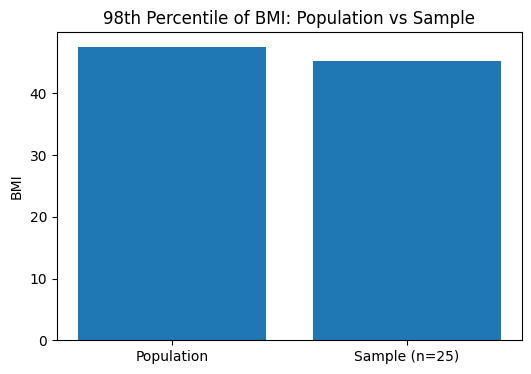

In [18]:
labels = ['Population', 'Sample (n=25)']
values = [pop_bmi_p98, sample_bmi_p98]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.ylabel('BMI')
plt.title('98th Percentile of BMI: Population vs Sample')
plt.show()


**c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure
and compare this with these statistics from the population for the same variable. Again, you
should create charts for this comparison.**

Bootstrap for BloodPressure
1. Drawing 500 samples with size 150
2. for each sample
mean BP
standard deviation of BP
98th percentile of BP
3. Compare average bootstrap stats with population stats and plot.

In [19]:
np.random.seed(123)  # for reproducibility

n_bootstrap = 500
sample_size = 150

boot_means = []
boot_sds   = []
boot_p98   = []

for i in range(n_bootstrap):
    boot_sample = population.sample(n=sample_size, replace=True)
    bp = boot_sample['BloodPressure']

    boot_means.append(bp.mean())
    boot_sds.append(bp.std(ddof=1))
    boot_p98.append(bp.quantile(0.98))

# Convert to numpy arrays
boot_means = np.array(boot_means)
boot_sds   = np.array(boot_sds)
boot_p98   = np.array(boot_p98)

# Bootstrap average statistics
boot_mean_of_means = boot_means.mean()
boot_mean_of_sds   = boot_sds.mean()
boot_mean_of_p98   = boot_p98.mean()

print("Bootstrap avg mean(BloodPressure):", boot_mean_of_means)
print("Bootstrap avg SD(BloodPressure)  :", boot_mean_of_sds)
print("Bootstrap avg 98th(BloodPressure):", boot_mean_of_p98)


Bootstrap avg mean(BloodPressure): 69.15222666666666
Bootstrap avg SD(BloodPressure)  : 19.192792750902836
Bootstrap avg 98th(BloodPressure): 98.03292000000003


Bar Chart: Population vs Bootstrap Averages

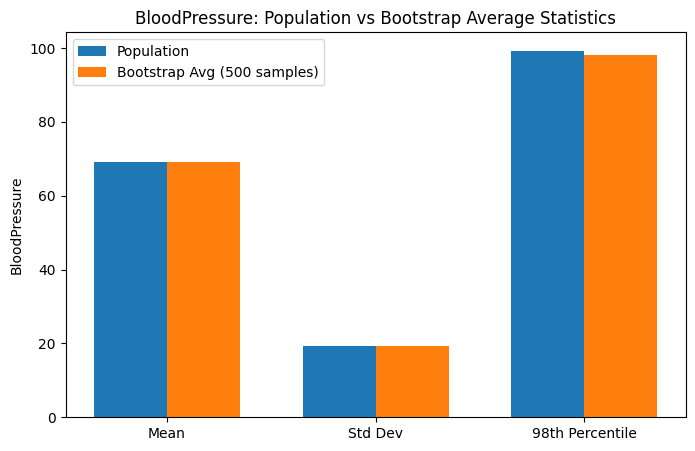

In [20]:
stat_names = ['Mean', 'Std Dev', '98th Percentile']
population_stats = [pop_bp_mean, pop_bp_sd, pop_bp_p98]
bootstrap_stats  = [boot_mean_of_means, boot_mean_of_sds, boot_mean_of_p98]

x = np.arange(len(stat_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, population_stats, width, label='Population')
plt.bar(x + width/2, bootstrap_stats,  width, label='Bootstrap Avg (500 samples)')

plt.xticks(x, stat_names)
plt.ylabel('BloodPressure')
plt.title('BloodPressure: Population vs Bootstrap Average Statistics')
plt.legend()
plt.show()


Histograms of Bootstrap Distributions

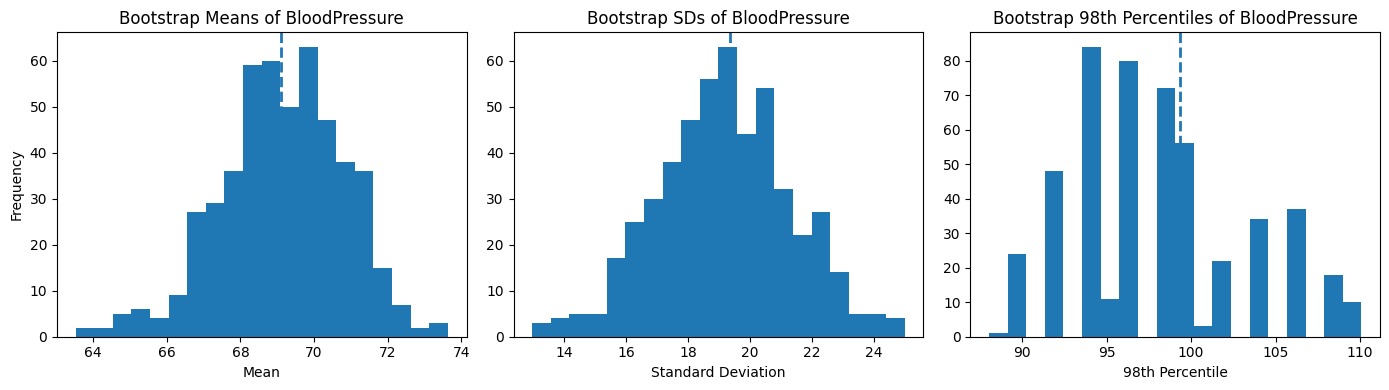

In [24]:
plt.figure(figsize=(14, 4))

# Mean
plt.subplot(1, 3, 1)
plt.hist(boot_means, bins=20)
plt.axvline(pop_bp_mean, linestyle='dashed', linewidth=2)
plt.title('Bootstrap Means of BloodPressure')
plt.xlabel('Mean')
plt.ylabel('Frequency')

# SD
plt.subplot(1, 3, 2)
plt.hist(boot_sds, bins=20)
plt.axvline(pop_bp_sd, linestyle='dashed', linewidth=2)
plt.title('Bootstrap SDs of BloodPressure')
plt.xlabel('Standard Deviation')


# 98th percentile
plt.subplot(1, 3, 3)
plt.hist(boot_p98, bins=20)
plt.axvline(pop_bp_p98, linestyle='dashed', linewidth=2)
plt.title('Bootstrap 98th Percentiles of BloodPressure')
plt.xlabel('98th Percentile')

plt.tight_layout()
plt.show()

## Findings / Report

### (a) Glucose: Sample of 25 vs Population

- Population mean Glucose ≈ 120.89.
- With seed = 123, sample (n=25) mean Glucose ≈ 130.36, which is a bit higher than the population mean.  
- Population max Glucose = 199, sample max Glucose ≈ 197.  
- The bar chart shows that for this small sample, the sample statistics are close but not exactly equal to the population values. This illustrates sampling variability.

### (b) 98th Percentile of BMI: Sample vs Population

- Population 98th percentile of BMI ≈ 47.53.
- Sample (n=25) 98th percentile of BMI ≈ 45.26 (with seed = 123), slightly lower than the population value.  
- The bar chart comparison shows that extreme percentiles (like 98th) can be quite sensitive to small sample sizes.

### (c) Bootstrap for BloodPressure

- Population BloodPressure:
  - Mean ≈ 69.11  
  - Standard deviation ≈ 19.36  
  - 98th percentile ≈ 99.32  

- From 500 bootstrap samples of size 150:
  - Average of bootstrap means ≈ 69.15 (very close to population mean).
  - Average of bootstrap standard deviations ≈ 19.19 (close to population SD).
  - Average of bootstrap 98th percentiles ≈ 98.03 (reasonably close to the population 98th percentile).

- The comparison bar chart shows that bootstrap averages are very close to the population values.
- The histograms of bootstrap statistics show that:
  - The bootstrap distribution of the mean is tightly centered around the population mean.
  - The SD and 98th percentile also fluctuate around the population values, but with more spread.
- Overall, the bootstrap results support the idea that bootstrapping can approximate the sampling distribution and provide good estimates of population statistics using resampling.


In [27]:
report_text = """
## Findings / Report

### (a) Glucose: Sample of 25 vs Population
[Findings / Report

### (a) Glucose: Sample of 25 vs Population

- Population mean Glucose ≈ 120.89.
- With seed = 123, sample (n=25) mean Glucose ≈ 130.36, which is a bit higher than the population mean.
- Population max Glucose = 199, sample max Glucose ≈ 197.
- The bar chart shows that for this small sample, the sample statistics are close but not exactly equal to the population values. This illustrates sampling variability.

### (b) 98th Percentile of BMI: Sample vs Population

- Population 98th percentile of BMI ≈ 47.53.
- Sample (n=25) 98th percentile of BMI ≈ 45.26 (with seed = 123), slightly lower than the population value.
- The bar chart comparison shows that extreme percentiles (like 98th) can be quite sensitive to small sample sizes.

### (c) Bootstrap for BloodPressure

- Population BloodPressure:
  - Mean ≈ 69.11
  - Standard deviation ≈ 19.36
  - 98th percentile ≈ 99.32

- From 500 bootstrap samples of size 150:
  - Average of bootstrap means ≈ 69.15 (very close to population mean).
  - Average of bootstrap standard deviations ≈ 19.19 (close to population SD).
  - Average of bootstrap 98th percentiles ≈ 98.03 (reasonably close to the population 98th percentile).

- The comparison bar chart shows that bootstrap averages are very close to the population values.
- The histograms of bootstrap statistics show that:
  - The bootstrap distribution of the mean is tightly centered around the population mean.
  - The SD and 98th percentile also fluctuate around the population values, but with more spread.
- Overall, the bootstrap results support the idea that bootstrapping can approximate the sampling distribution and provide good estimates of population statistics using resampling.
]

"""

# Make sure the 'reports' folder exists (in Colab, it's relative to /content)
import os
os.makedirs('reports', exist_ok=True)

with open('reports/part2_diabetes_findings.md', 'w') as f:
    f.write(report_text)

print("Report saved to reports/part2_diabetes_findings.md")


Report saved to reports/part2_diabetes_findings.md
